# Simulating the diffusion equation

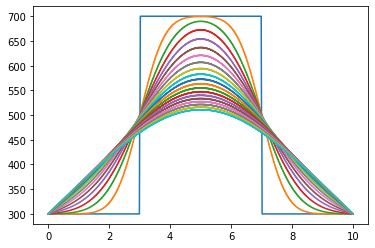

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = 10.
# intervals in x-, y- directions, mm
dx = 0.01
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

TotTime = 1

nx = int(w/dx)

dx2 = dx*dx
dt = dx2 / (2 * D )

u0 = Tcool * np.ones(nx)
u = u0.copy()

x = np.linspace(0,w,nx)

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx = 2, 5
r2 = r**2
for i in range(nx):
    p2 = (i*dx-cx)**2 
    if p2 < r2:
        u0[i] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1] = u0[1:-1] + D * dt * (
          (u0[2:] - 2*u0[1:-1] + u0[:-2])/dx2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 20
# Times of outputs

fig = plt.figure()
ax = fig.add_subplot(111)


for m in range(int(TotTime/dt)):
    u0, u = do_timestep(u0, u)
    if m in range(0, int(TotTime/dt), int(TotTime/(dt * nsteps))):
        ax.plot(x[1:-1], u.copy()[1:-1])
        
plt.show()


In [5]:
u.copy()[1:-1].shape

(998,)

In [13]:
dt

0.125

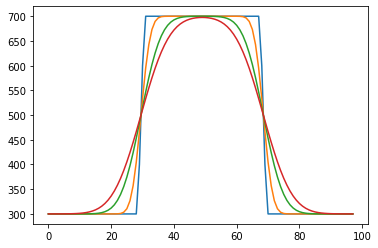

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]

fig = plt.figure()
ax = fig.add_subplot(111)

for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        ax.plot(u.copy()[1:-1,int(h/(2*dy))])
        
plt.show()


In [6]:
h//(2*dy)

49.0

An example of a two dimensional diffusion process is the diffusion of heat from a circular source across a rectangular plate. The initial temperature is `Tcold` and the temperature of the heat source is `Thot`.

0 1
10 2
50 3
100 4


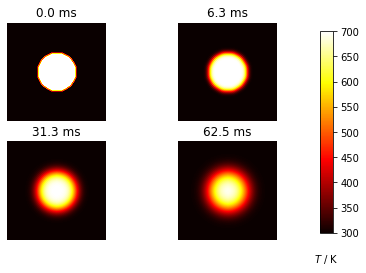

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

## Charges surfaces in solution, no salt

We are going to consider first a situation, in which there is a solid surface (for example glass) in contact with a solution, which is presumably water. In this case, surface chemical groups on the solid may dissociate due to the high dielectric constant of water such that the residular surface is charged and some ions are dissolved in the solution. We will assume that there is no extra salt which is dissolved in water. 

The questions that arise now are

- How are the dissolved ions distributed in space?
- How does the ion distribution depend on the surface charge?
- How is the electrostatic potential inside the liquid?

As the ions populate the regions according to their potential energy in the electric field of the surface charges, we have to combine the Poisson euqation with the Boltzmann equation to have a complete description. This combination will deliver us a mean field appraoch. 

## Poisson-Boltzmann equation

If we name the electrostatic potential $\psi$ and number density of ions of a valancy $z$ $\rho$, we can on one side write down the Boltzmann equation

\begin{equation}
\rho=\rho_0 \exp\left ( -\frac{z e\psi}{k_B T}\right)\tag{Boltzmann equation}
\end{equation}

end the Poisson equation as

\begin{equation}
ze\rho =-\epsilon_0 \epsilon \frac{d^{2}\psi}{dx^2}\tag{Poisson equation}
\end{equation}

As both contain the charge density $\rho$ we can combine them to yield

\begin{equation}
\frac{d^2\psi}{dx^2} = -\frac{ze\rho}{\epsilon_0 \epsilon} =-\frac{ze \rho_0}{\epsilon_0 \epsilon}\exp\left ( -\frac{z e\psi}{k_B T}\right)\tag{Poisson-Boltzmann equation}
\end{equation}

the Poisson-Boltzmann equation, which is a non-linear differential equation in the potential $\psi$ and therefore difficult to solve. 

In the following we would like to determine the surface values for the potential $\psi_s$, the electric field $E_s$ and the density $\rho_s$, which are called contact values. We will do that for a system of two solid surfaces each with a surface charge density $\sigma$ according to the configuration shown below.

![Config](img/configuration.png)

This system is symmetric with respect to the mid-plane at $x=0$ and thus the potential is $\psi_0=\psi(x=0)=0$ and the charge number density is $\rho_o=\rho(x=0)$. Also, due to symmetry we have $\frac{d\psi}{dx}|_{x=0}=0$. It follows from this symmetry that

\begin{equation}
\sigma=-\int_{0}^{D / 2} z e q d x=\epsilon_{0} \epsilon \int_0^{D / 2}\left(\frac{d^{2} \psi}{d x^{2}}\right)^{2} dx=-\epsilon_{0} \epsilon\left(\frac{d \psi}{d x}\right)|_{D / 2}=-\epsilon_{0} \epsilon\left(\frac{d \psi}{d x}\right)|_{S}=-\epsilon_0 \epsilon E_{s}
\end{equation}

To obtain the charge number density, we use the derivative of the Boltzmann equation with respect to the position

\begin{equation}
\frac{d\rho}{dx}=-\frac{ze\rho_0}{k_B T}\exp\left ( -\frac{z e\psi}{k_B T}\right)\frac{d\psi}{dx}
\end{equation}

The term on the right side can be replaced to yield

\begin{equation}
\frac{d\rho}{dx}=-\frac{ze\rho_0}{k_B T}\exp\left ( -\frac{z e\psi}{k_B T}\right)\frac{d\psi}{dx}=\frac{\epsilon_0 \epsilon}{k_B T}\left ( \frac{d\psi}{dx}\right ) \left (\frac{d^2\psi}{dx^2} \right )=\frac{\epsilon_0 \epsilon}{k_B T}\frac{d}{dx}\left ( \frac{d\psi}{dx}\right )^2
\end{equation}

thus we can integrate both sides

\begin{equation}
\rho_x- \rho_0=\int_0^{x}d\rho = \frac{\epsilon_0 \epsilon}{2k_B T} \left (\frac{d\psi}{dx} \right )^2_x
\end{equation}

or 

\begin{equation}
\rho_x=\rho_0 + \frac{\epsilon_0 \epsilon}{2k_B T} \left (\frac{d\psi}{dx} \right )^2_x
\end{equation}




The term $\frac{d\psi}{dx}$, which appears as a square in the last formula is just the electric field evaluated at the position $x$. With the contact value of the electric field $E_s$ obtained above, we can immediately write the contact value of the charge number density as 

\begin{equation}
\rho_s=\rho_s+\frac{\sigma^2}{2\epsilon_0 \epsilon k_B T}
\end{equation}

Thus even in the case, when the two surfaces are seperated by an infinite distance $\rho_0\rightarrow 0$, the surface charge number density never falls below $\frac{\sigma^2}{2\epsilon_0 \epsilon k_B T}$.




To obtain the charge number density, the potential and the electric field we must solve the Poisson Boltzmann equation. The solution in the case of no additional electrolyte is given by

\begin{equation}
\psi=\frac{k_B T }{z e}\ln(\cos^{2}(Kx))
\end{equation}

or 

\begin{equation}
\exp\left ( -\frac{z e \psi}{k_B T}\right )=\frac{1} { \cos ^{2} (K x)}
\end{equation}

where the constant $K$ is given by

\begin{equation}
K^{2}=\frac{(z e)^{2} \rho_{0} }{ 2 \epsilon_{0} \epsilon k_B T}
\end{equation}

To find the value of the constant $K$, we can take the derivative of the potential to obtain the electric field

\begin{equation}
E_{x}=-\frac{d\psi}{dx}= \frac{2k_B T K}{z e}\tan(K x)
\end{equation}

which is given at the surface to be

\begin{equation}
E_{s}=-\frac{d\psi}{dx}\bigg|_s = \frac{2k_B T K}{z e}\tan\left (K \frac{D}{2}\right)=-\frac{\sigma}{\epsilon_0 \epsilon}
\end{equation}

If the surface charge density $\sigma$ is fixed and the thickness of the liquid layer $D$ is known, the latter equation can be graphically solved to obtain the value of $K$. The counter ion density in the solution is then given by

\begin{equation}
\rho(x)=\rho_0\exp\left (\frac{-ze\psi }{k_B T}\right)=\frac{\rho_0}{\cos^{2}(Kx)}
\end{equation}

### Example

Two surfaces with a charge density of $\sigma=0.2\, C\cdot m^{-2}$ are at a distance of $D=2 nm$ in water at $T=293\,K$. We calculate the counter ion surface charge, the charge density, the electric field and the potential inside the water film between the two layers. We therefore first calculate a value of

\begin{equation}
KTK=\frac{ze\sigma}{2k_B T\epsilon_0\epsilon}
\end{equation}

which shall be equal to $K\tan\left (KD/2\right )$.

In [225]:
sigma=0.2 # C/m^2
epsilon=80 # water
D=2e-9 # m
T=293 # K

KTK=e*sigma/(2*k*T*epsilon_0*epsilon)

With the help of the previous definitions, we may search for the solution which gives the value of $K$.

In [226]:
# numerically solve for K
func = lambda K : KTK - K*np.tan(K*D/2) 
K_initial_guess = 0.8*np.pi/D
K = fsolve(func, K_initial_guess)

#### Plot of the charge density

In [227]:
# ion density in the mid plane
rho0=K**2*2*epsilon_0*epsilon*k*T/e**2

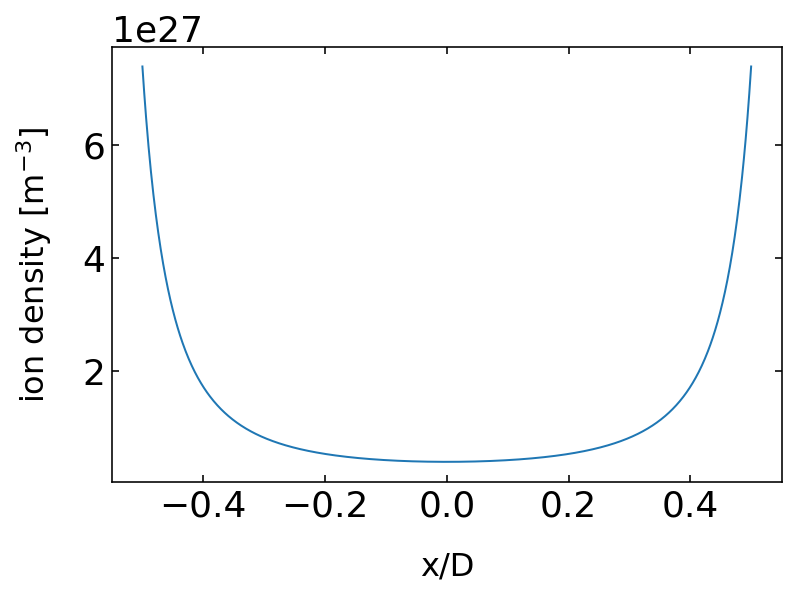

In [228]:
# ion density in the gap
x=np.linspace(-D/2,D/2,1000)
plt.plot(x/D,rho0/(np.cos(K*x)**2))
plt.xlabel(r'x/D',fontsize=16)
plt.ylabel(r'ion density [m$^{-3}$]',fontsize=16)
plt.show()

#### Plot of the electric potential

Text(0, 0.5, 'electric potential [V]')

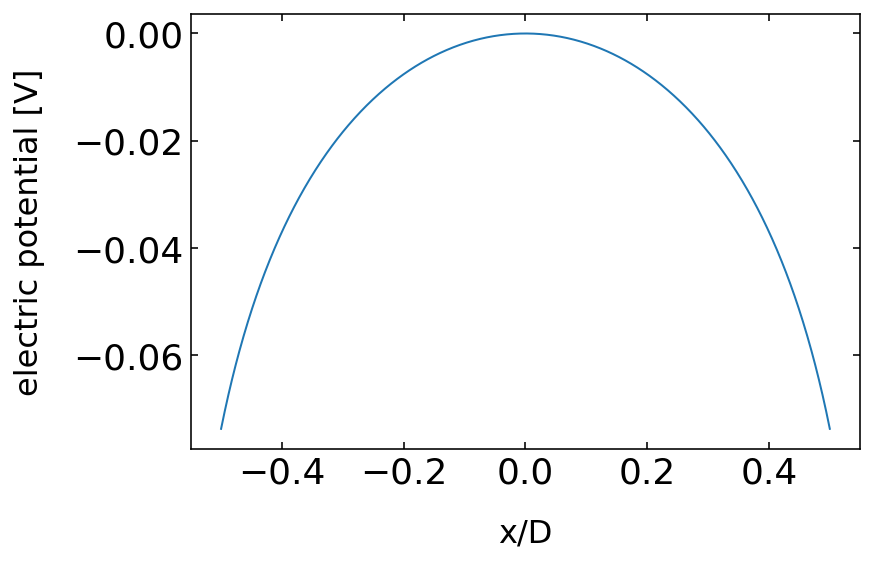

In [229]:
# potential in the gap
x=np.linspace(-D/2,D/2,1000)
plt.plot(x/D,k*T*np.log(np.cos(K*x)**2)/e)
plt.xlabel(r'x/D',fontsize=16)
plt.ylabel(r'electric potential [V]',fontsize=16)

#### Plot of the electric field

Text(0, 0.5, 'electric field [V/m]')

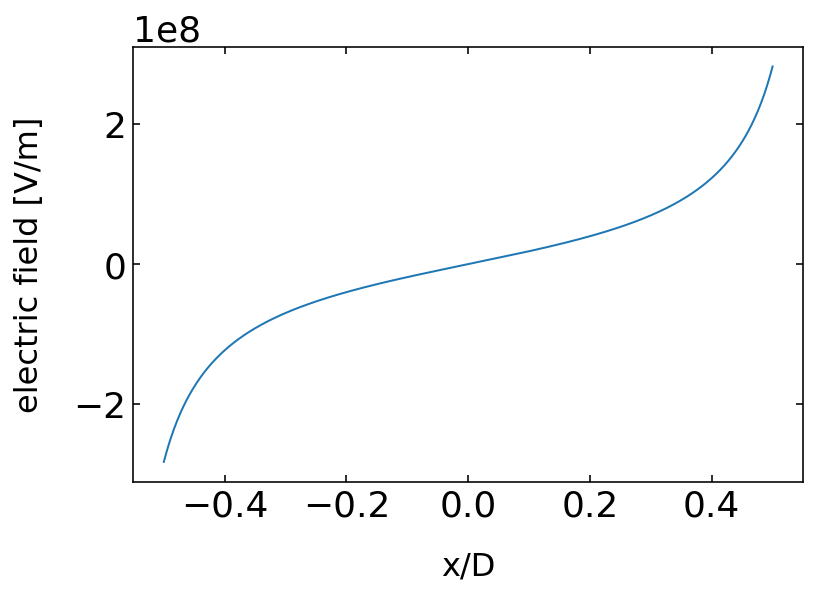

In [232]:
# field in the gap
x=np.linspace(-D/2,D/2,1000)
plt.plot(x/D,2*k*T*K*np.tan(K*x)/e)
plt.xlabel(r'x/D',fontsize=16)
plt.ylabel(r'electric field [V/m]',fontsize=16)